### Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()

### Data Preprocessing
#### Loading data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('winequality-red.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1616.000000,1609.000000,1613.000000,1616.000000,1612.000000,1615.000000,1610.000000,1616.000000,1612.000000,1615.000000,1610.000000,1616.000000
mean,8.312067,0.528580,0.269938,2.535860,0.087494,15.839628,46.418012,0.996749,3.311694,0.657381,10.415311,5.637376
std,1.734540,0.179847,0.194745,1.403265,0.046880,10.421105,32.802128,0.001878,0.153947,0.168960,1.066643,0.804593
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Dealing with missing values
Now, let us look at how to handle data with missing values in one or more fields among its records. <br>
The missing values could be due to system failure, people error or change in data schema. <br>
We will check what percentage of missing values are there in each column.

In [4]:
raw_data.isnull().sum()

fixed acidity           0
volatile acidity        7
citric acid             3
residual sugar          0
chlorides               4
free sulfur dioxide     1
total sulfur dioxide    6
density                 0
pH                      4
sulphates               1
alcohol                 6
quality                 0
color                   9
dtype: int64

Seeing the missing percentages from the results, we would not be dropping any columns in entirety. 

We notice that that are some rows missing the data cell for color, which is a string data type. <br>
We can simply fill the column as we know that the string should only be "red" for red wine.

In [5]:
raw_data['color'].fillna("red", inplace=True)

We also notice that the dataset has missing cells for the wine's physiochemical properties, a way would be to calculate the mean of all the entries to fill the missing cells, however this may alter the comparison as well as the prediction in the quality of wine. Instead, we will deal with the data rows with missing values by removing them instead. 

In [6]:
redwine_nomv = raw_data.dropna(subset=["volatile acidity", "citric acid", "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                     "pH", "sulphates", "alcohol"])

As the whole dataset is on red wine , the column for color should be dropped

In [7]:
redwine_no_mv = redwine_nomv.drop('color', axis=1)

In [8]:
redwine_no_mv.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Exploration

By plotting a histogram, we are able to show how each column is in its skewness. <br>
We have also calculated the skewness for each physiochemical input. <br>
We will add our input column that we would like to see in a list, for these oberservations we will not be listing the column 'color'.

In [9]:
redwine_no_mv.skew(axis = 0, skipna = True) 

fixed acidity           0.985648
volatile acidity        0.668744
citric acid             0.319691
residual sugar          4.544659
chlorides               5.683882
free sulfur dioxide     1.252623
total sulfur dioxide    1.518084
density                 0.071344
pH                      0.191743
sulphates               2.431905
alcohol                 0.860383
quality                 0.215516
dtype: float64

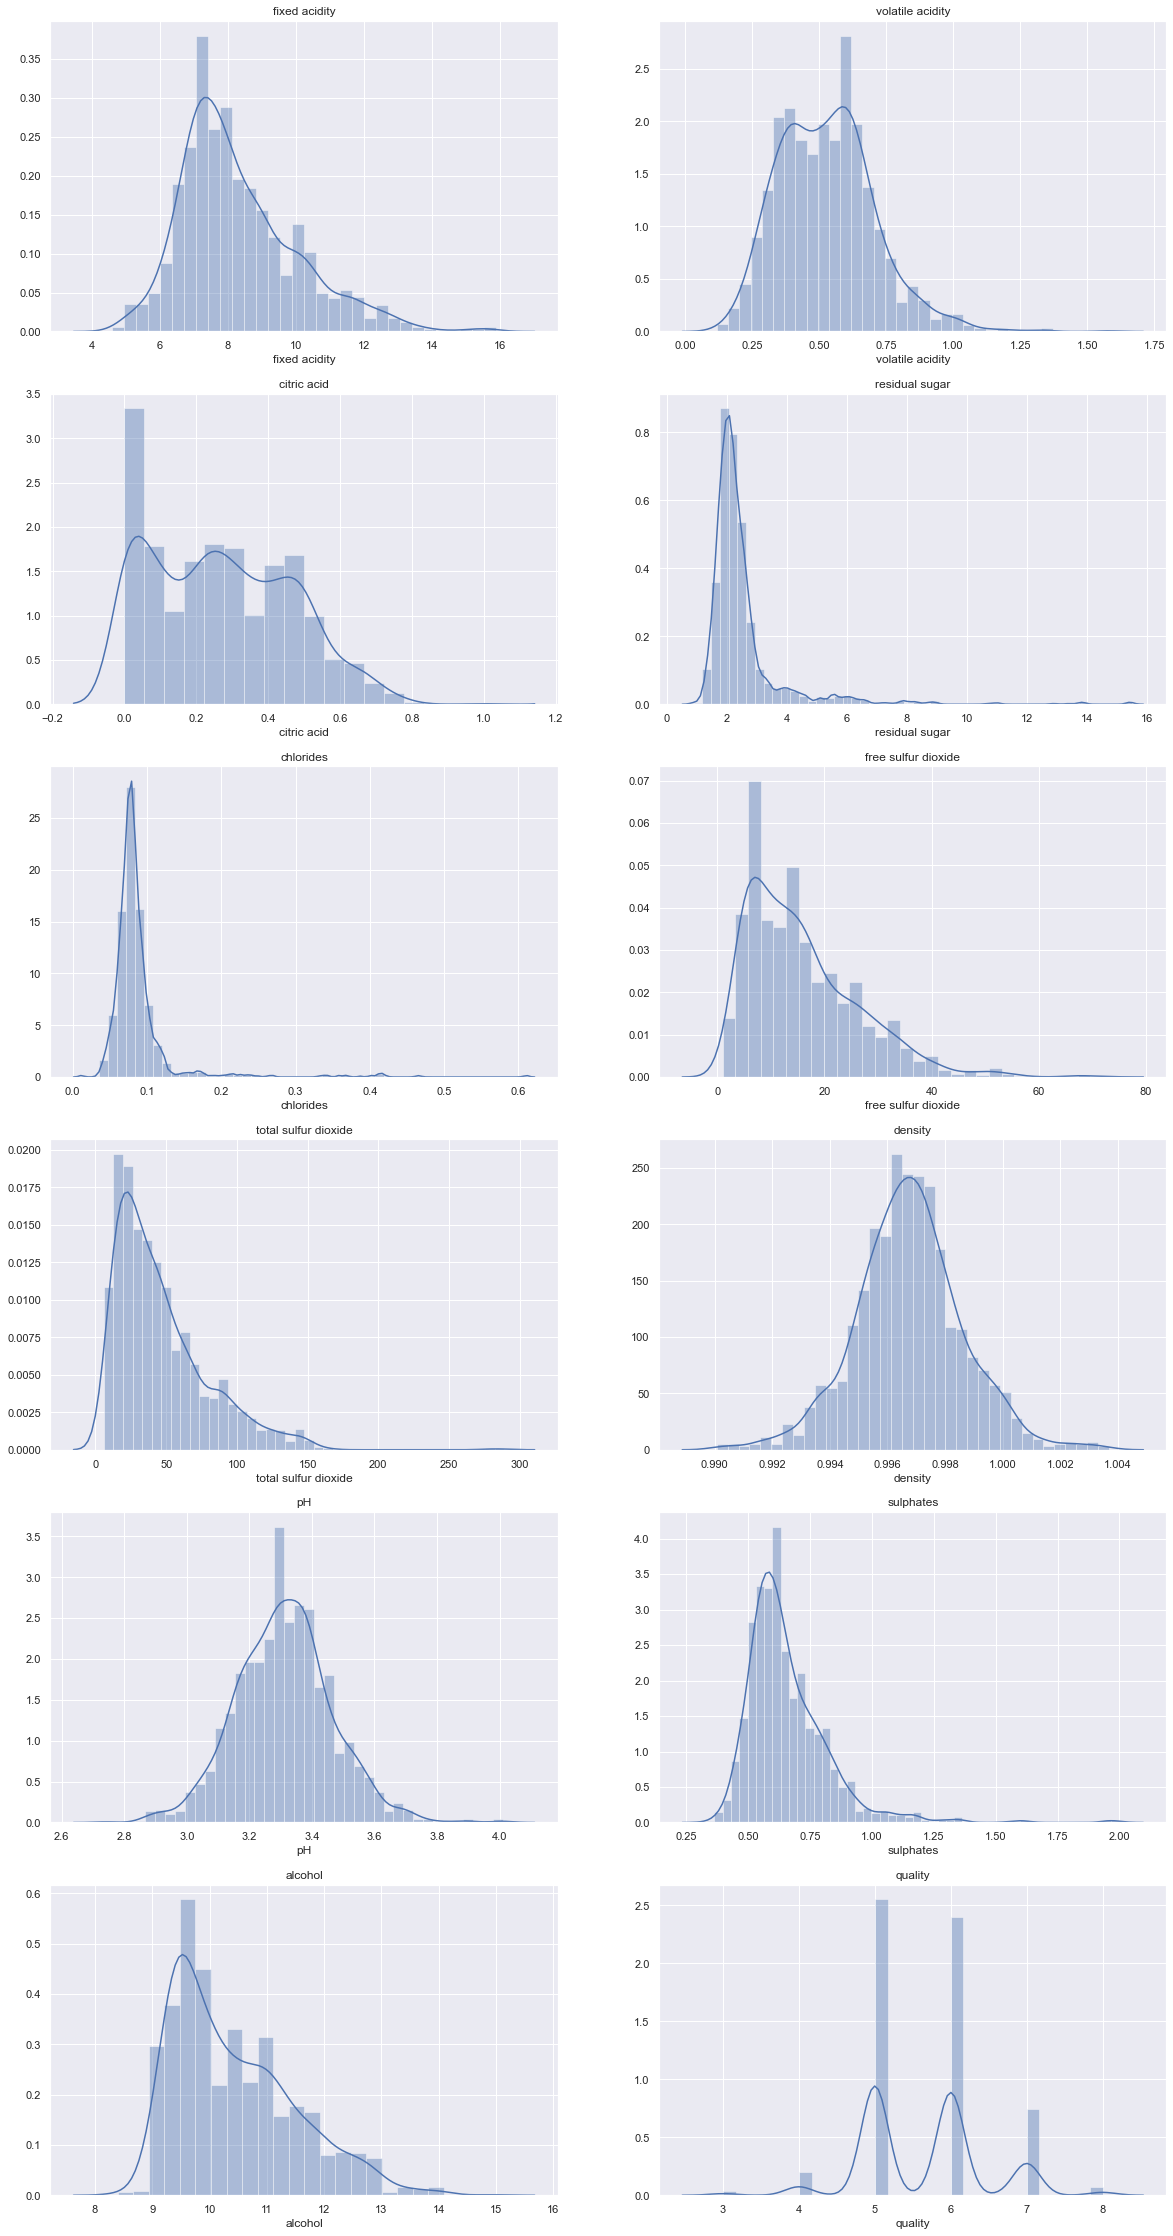

In [10]:
plt.figure(figsize=(20, 40))
plt.subplot(6,2,1)
plt.title('fixed acidity')
sns.distplot(redwine_no_mv['fixed acidity'])

plt.subplot(6,2,2)
plt.title('volatile acidity')
sns.distplot(redwine_no_mv['volatile acidity'])

plt.subplot(6,2,3)
plt.title('citric acid')
sns.distplot(redwine_no_mv['citric acid'])

plt.subplot(6,2,4)
plt.title('residual sugar')
sns.distplot(redwine_no_mv['residual sugar'])

plt.subplot(6,2,5)
plt.title('chlorides')
sns.distplot(redwine_no_mv['chlorides'])

plt.subplot(6,2,6)
plt.title('free sulfur dioxide')
sns.distplot(redwine_no_mv['free sulfur dioxide'])

plt.subplot(6,2,7)
plt.title('total sulfur dioxide')
sns.distplot(redwine_no_mv['total sulfur dioxide'])

plt.subplot(6,2,8)
plt.title('density')
sns.distplot(redwine_no_mv['density'])

plt.subplot(6,2,9)
plt.title('pH')
sns.distplot(redwine_no_mv['pH'])

plt.subplot(6,2,10)
plt.title('sulphates')
sns.distplot(redwine_no_mv['sulphates'])

plt.subplot(6,2,11)
plt.title('alcohol')
sns.distplot(redwine_no_mv['alcohol'])

plt.subplot(6,2,12)
plt.title('quality')
sns.distplot(redwine_no_mv['quality'])

From our skewness and description, we can notice the following:
- All the input physiochemicals are positively skewed. 
- The coefficient of variation (ratio of mean to standard deviation) is not high suggesting that some of the observations are not far spread out.

For more information on the physiochemical inputs in relation to the quality of wine, we can plot box plot which allows us to see how are they related. A box plot is also able to graph out the min, mean, max, lower quartile and upper quartile as well as looking out for outliers in our oberservations.

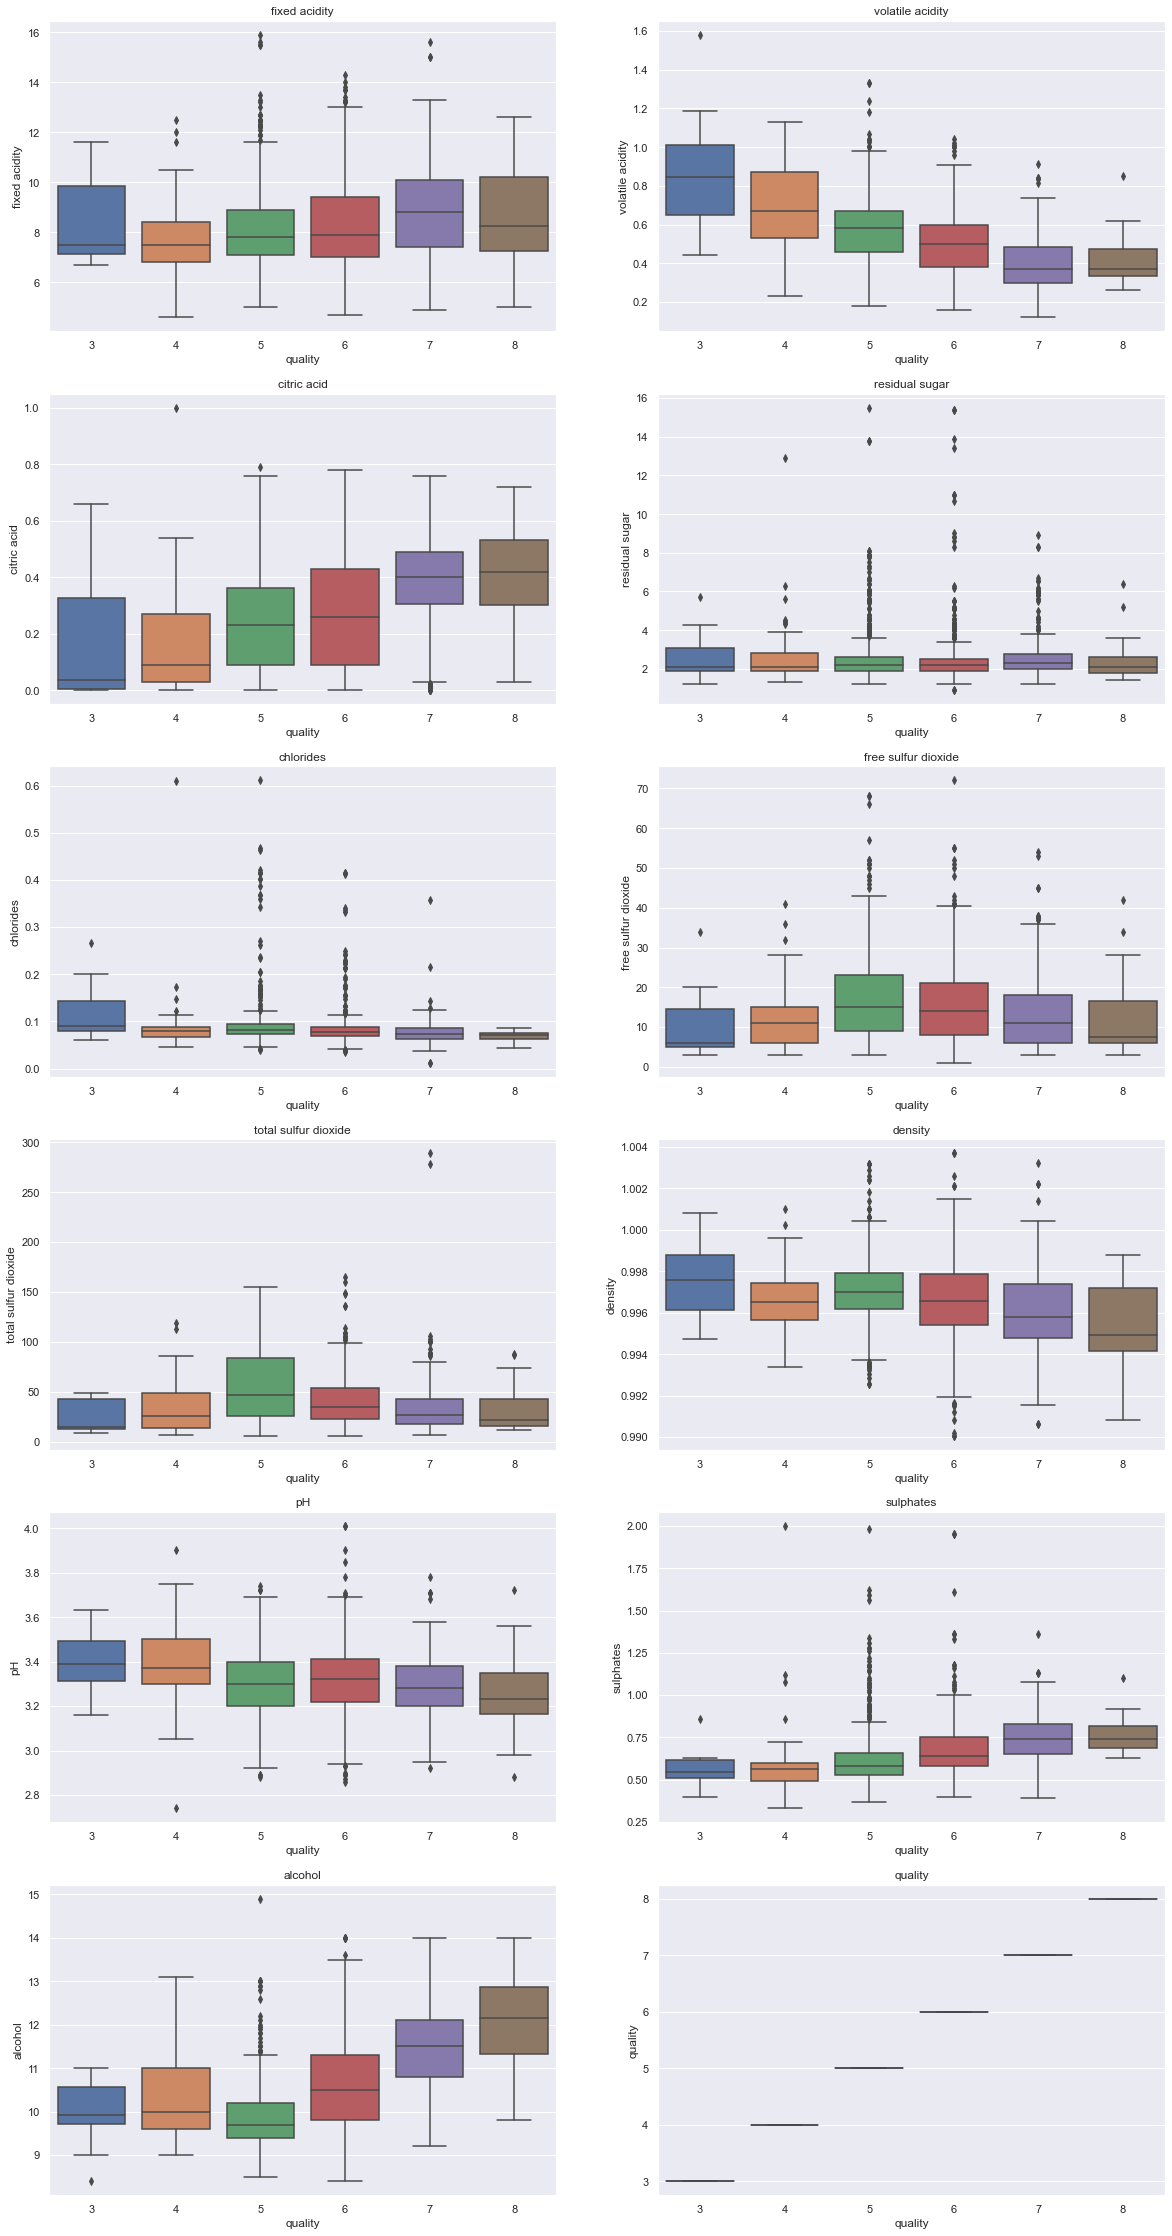

In [11]:
plt.figure(figsize=(20, 40))
plt.subplot(6,2,1)
plt.title('fixed acidity')
sns.boxplot(x="quality", y="fixed acidity", data = redwine_no_mv)

plt.subplot(6,2,2)
plt.title('volatile acidity')
sns.boxplot(x="quality", y="volatile acidity", data = redwine_no_mv)

plt.subplot(6,2,3)
plt.title('citric acid')
sns.boxplot(x="quality", y="citric acid", data = redwine_no_mv)

plt.subplot(6,2,4)
plt.title('residual sugar')
sns.boxplot(x="quality", y="residual sugar", data = redwine_no_mv)

plt.subplot(6,2,5)
plt.title('chlorides')
sns.boxplot(x="quality", y="chlorides", data = redwine_no_mv)

plt.subplot(6,2,6)
plt.title('free sulfur dioxide')
sns.boxplot(x="quality", y="free sulfur dioxide", data = redwine_no_mv)

plt.subplot(6,2,7)
plt.title('total sulfur dioxide')
sns.boxplot(x="quality", y="total sulfur dioxide", data = redwine_no_mv)

plt.subplot(6,2,8)
plt.title('density')
sns.boxplot(x="quality", y="density", data = redwine_no_mv)

plt.subplot(6,2,9)
plt.title('pH')
sns.boxplot(x="quality", y="pH", data = redwine_no_mv)

plt.subplot(6,2,10)
plt.title('sulphates')
sns.boxplot(x="quality", y="sulphates", data = redwine_no_mv)

plt.subplot(6,2,11)
plt.title('alcohol')
sns.boxplot(x="quality", y="alcohol", data = redwine_no_mv)

plt.subplot(6,2,12)
plt.title('quality')
sns.boxplot(x="quality", y="quality", data = redwine_no_mv)

From our box plot observations, we are able to detect that there are outliers in our dataset, however I have chosen not to take them out as, different levels in physiochemical can result in a better or lesser quality of wine; taking these observation may result in a list of wine with the same quality and physiochemical properties.

We can see on the box plot that they maybe a pattern in our physichemicals in realtion to quality. <br>
Plotting a bar graph could help us see the pattern more clarity.

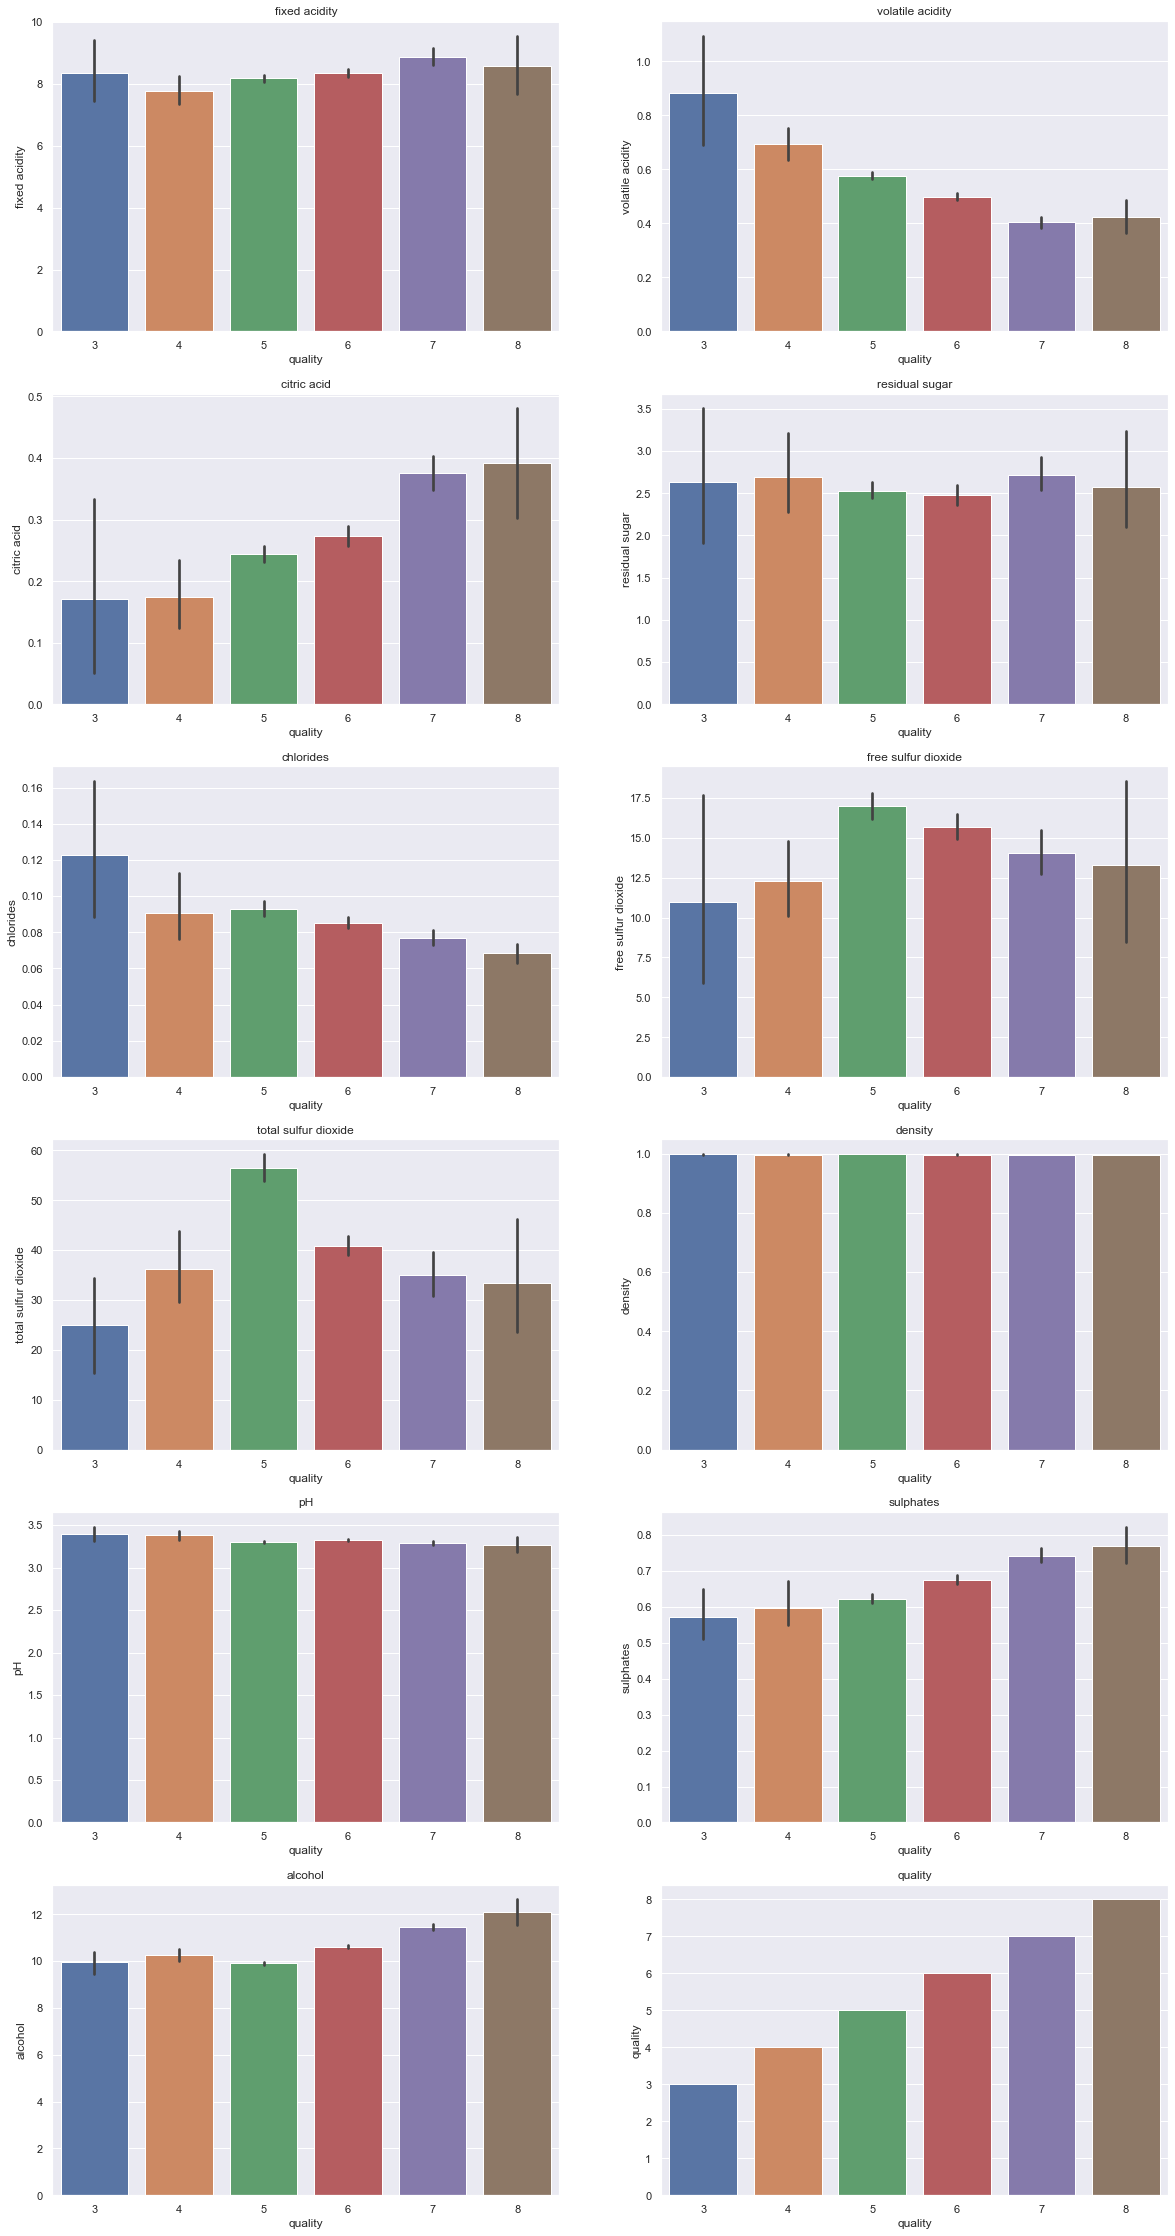

In [12]:
plt.figure(figsize=(20, 40))
plt.subplot(6,2,1)
plt.title('fixed acidity')
sns.barplot(x="quality", y="fixed acidity", data = redwine_no_mv)

plt.subplot(6,2,2)
plt.title('volatile acidity')
sns.barplot(x="quality", y="volatile acidity", data = redwine_no_mv)

plt.subplot(6,2,3)
plt.title('citric acid')
sns.barplot(x="quality", y="citric acid", data = redwine_no_mv)

plt.subplot(6,2,4)
plt.title('residual sugar')
sns.barplot(x="quality", y="residual sugar", data = redwine_no_mv)

plt.subplot(6,2,5)
plt.title('chlorides')
sns.barplot(x="quality", y="chlorides", data = redwine_no_mv)

plt.subplot(6,2,6)
plt.title('free sulfur dioxide')
sns.barplot(x="quality", y="free sulfur dioxide", data = redwine_no_mv)

plt.subplot(6,2,7)
plt.title('total sulfur dioxide')
sns.barplot(x="quality", y="total sulfur dioxide", data = redwine_no_mv)

plt.subplot(6,2,8)
plt.title('density')
sns.barplot(x="quality", y="density", data = redwine_no_mv)

plt.subplot(6,2,9)
plt.title('pH')
sns.barplot(x="quality", y="pH", data = redwine_no_mv)

plt.subplot(6,2,10)
plt.title('sulphates')
sns.barplot(x="quality", y="sulphates", data = redwine_no_mv)

plt.subplot(6,2,11)
plt.title('alcohol')
sns.barplot(x="quality", y="alcohol", data = redwine_no_mv)

plt.subplot(6,2,12)
plt.title('quality')
sns.barplot(x="quality", y="quality", data = redwine_no_mv)

From the bar graph, we can make out the following observations:
- Increase in quality by decreasing volatile acidity levels
- Increase in quality by increasing citric acid levels
- Increase in quality by decreasing chloride levels
- Increase in quality by decreasing pH levels (slight)
- Increase in quality by increasing sulphates levels
- Increase in quality by increasing alcohol levels

We can also see that:
- density levels stay the same in all quality levels
- 'free sulfur dioxide' and 'total sulfur dioxide' does not seem to affect quality levels
- 'fixed acidity' and 'residual sugar' levels does not seem to affect quality levels

So far we have only seen how each physiochemical is related to quality, however what about to each other. Calculating a correlation coefficients matrix can help us understand more about our data.

In [13]:
redwine_no_mv.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256641,0.671902,0.115256,0.093421,-0.153514,-0.112821,0.667786,-0.683080,0.183454,-0.059936,0.123437
volatile acidity,-0.256641,1.000000,-0.552813,0.001433,0.061493,-0.010692,0.076167,0.022021,0.235241,-0.261348,-0.203314,-0.389883
citric acid,0.671902,-0.552813,1.000000,0.144469,0.202920,-0.060400,0.036136,0.364283,-0.541843,0.313342,0.112990,0.224748
residual sugar,0.115256,0.001433,0.144469,1.000000,0.055425,0.187160,0.203195,0.355214,-0.085948,0.005916,0.043129,0.013344
chlorides,0.093421,0.061493,0.202920,0.055425,1.000000,0.005494,0.047298,0.200625,-0.264835,0.370997,-0.221270,-0.128706
free sulfur dioxide,-0.153514,-0.010692,-0.060400,0.187160,0.005494,1.000000,0.667691,-0.021946,0.070238,0.051801,-0.068843,-0.050796
total sulfur dioxide,-0.112821,0.076167,0.036136,0.203195,0.047298,0.667691,1.000000,0.071264,-0.066665,0.043158,-0.204656,-0.185271
density,0.667786,0.022021,0.364283,0.355214,0.200625,-0.021946,0.071264,1.000000,-0.341652,0.148475,-0.495357,-0.174884
pH,-0.683080,0.235241,-0.541843,-0.085948,-0.264835,0.070238,-0.066665,-0.341652,1.000000,-0.196911,0.204309,-0.057391
sulphates,0.183454,-0.261348,0.313342,0.005916,0.370997,0.051801,0.043158,0.148475,-0.196911,1.000000,0.094572,0.250910


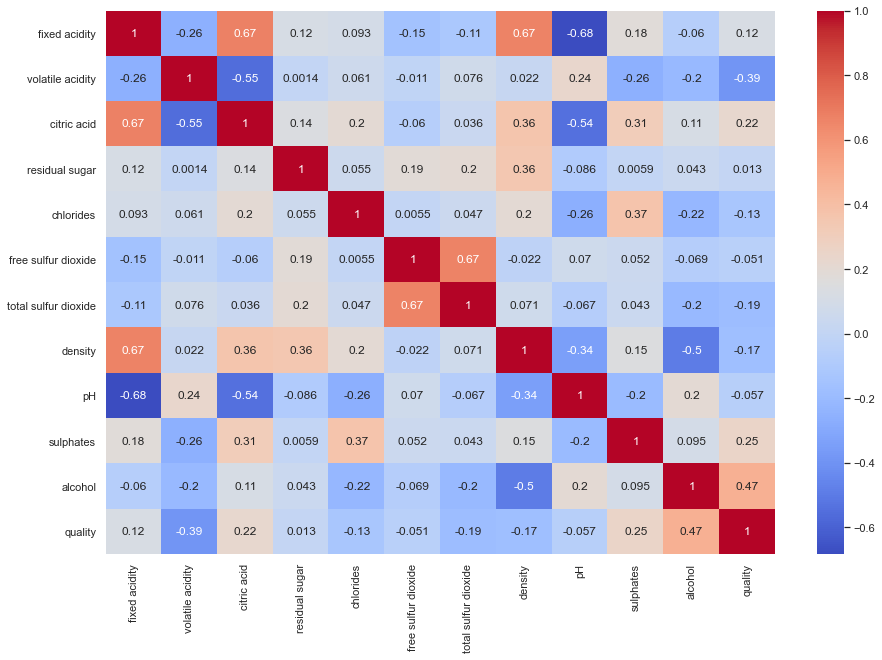

In [14]:
plt.subplots(figsize=(15, 10))
sns.heatmap(redwine_no_mv.corr(), annot=True, cmap = 'coolwarm')
plt.show()

From the correlation table, we can make the following observations:
- volatile acidity related at -0.389 correlation coefficient to quality
- citric acid related at 0.225 correlation coefficient to quality
- chloride related at -0.129 correlation coefficient to quality
- pH related -0.057 correlation coefficient to quality
- sulphates related at 0.250 correlation coefficient to quality
- alcohol related at 0.474 correlation coefficient to quality

We can confirm that the following observations mentioned are of the same observations that we have seen in our bar graph observation. 

We can also make the following observations:
- free sulfur dioxide and total sulfur dioxide seems to be strongly related to each other at 0.667 correlation coefficient
- citric acid seems to be related to fixed acidity , volatile acidity and pH at 0.67, -0.5528 and -0.541 correlation coefficient respectively
- fixed acidity seems to be related to density and pH at 0.667 and -0.683 correlation coefficient respectively

I have decided to choose all the columns except for 'free sulfur dioxide' and 'total sulfur dioxide' where they show no strong correlation to 'quality' output and are strongly related only to each other.

In [15]:
redwinefinal = redwine_no_mv.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1)

### Checkpoint

In [16]:
redwinefinal.to_csv('redwine_preprocessed.csv', index=False)